In [16]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [17]:
df = pd.read_csv("dataset_modificado/dataset-usuarios-categorias.csv")
df.head()

,App,Translated_Review,sentences_count,characters_count,sentiment_polarity_score,sentiment_polarity,sentiment_subjectivity_score,sentiment_subjectivity,spelling_quality_score,spelling_quality,ease_of_reading_score,ease_of_reading_quality,grammar_check_score,Category,Rating,Installs
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2,122,1.00,Very positive,0.533333,Objective/subjective,0.875,Bad,86.20,Easy,5,15,4.0,500000.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,47,0.25,Pretty positive,0.288462,Pretty objective,1.000,Very good,38.99,Difficult,0,15,4.0,500000.0
2,10 Best Foods for You,Works great especially going grocery store,1,42,0.40,Pretty positive,0.875000,Quite subjective,1.000,Very good,48.47,Difficult,0,15,4.0,500000.0
3,10 Best Foods for You,Best idea us,1,12,1.00,Very positive,0.300000,Pretty objective,1.000,Very good,119.19,Very Easy,1,15,4.0,500000.0
4,10 Best Foods for You,Best way,1,8,1.00,Very positive,0.300000,Pretty objective,1.000,Very good,120.21,Very Easy,0,15,4.0,500000.0


Text(0, 0.5, 'spelling_quality_score')

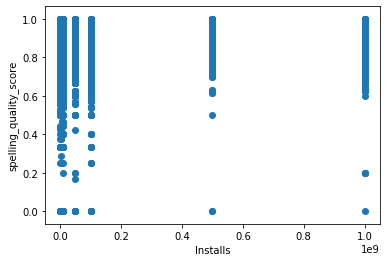

In [18]:
plt.scatter(df.Installs,df['spelling_quality_score'])
plt.xlabel('Installs')
plt.ylabel('spelling_quality_score')

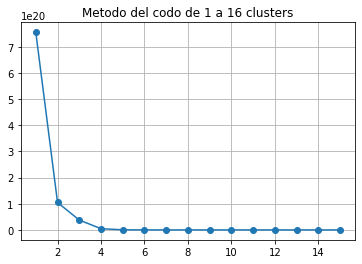

4

In [19]:
def select_clusters(max_clusters,X,graph=True):
  sse = []

  clusters = list(range(1, max_clusters))
  for k in clusters:
      kmeans = KMeans(n_clusters=k).fit(X)
      sse.append(kmeans.inertia_)


  min=-1
  diff_min=0
  for i in range(len(sse)-1):
    if(i==0):
      diff_min=abs(sse[i]-sse[i+1])
      diff_init=diff_min #se toma la diferencia de inertia inicial 
    else:
      diff=sse[i]-sse[i+1]
    

      if((abs(diff_min-diff)/diff_init)<0.01):#si la diferencia de inertia entre el elemnto actual y el siguiente es menor al 1% de la diferencia inicial se selecciona el cluster actual (valor definido a base de testing)
        min=i
        
        break
      
      else:
        diff_min=diff



  if(graph):
    plt.plot(clusters, sse, marker="o")
    plt.title("Metodo del codo de 1 a "+str(max_clusters)+" clusters")
    plt.grid(True)
    plt.show()


  return min


a=df.drop(columns=["Translated_Review", "App","sentiment_polarity","sentiment_subjectivity", "spelling_quality","ease_of_reading_quality"])
select_clusters(16,a)

In [21]:

km = KMeans(n_clusters=4)#hay que ver cuantos son
km.fit(a)
centers = km.cluster_centers_
labels=km.labels_

print(centers)

#labels o asignaciones escogidas

print(labels)

ypred

[[2.49955944e+00 1.05134811e+02 1.94333105e-01 4.94414089e-01
  8.93654999e-01 7.41959324e+01 1.35435097e+00 1.63163923e+01
  4.27620625e+00 7.52262235e+06]
 [3.93353474e+00 1.94637462e+02 1.21008874e-01 4.94777723e-01
  8.80607827e-01 6.68190483e+01 2.35347432e+00 1.95604230e+01
  4.20030211e+00 1.00000000e+09]
 [4.29295154e+00 1.90792952e+02 9.00533851e-02 4.65512828e-01
  8.97923154e-01 7.26339648e+01 2.14977974e+00 1.91321586e+01
  4.36806167e+00 5.00000000e+08]
 [3.53744097e+00 1.63640432e+02 1.00311207e-01 4.88579080e-01
  8.90098022e-01 7.27718282e+01 2.13627164e+00 1.64391725e+01
  4.42993029e+00 1.00000000e+08]]
[0 0 0 ... 0 0 0]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

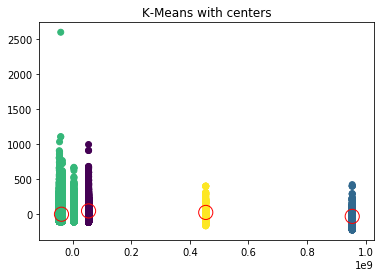

In [22]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(a)


new_kmeans = KMeans(n_clusters=4).fit(new_X)
new_centers = new_kmeans.cluster_centers_


plt.scatter(new_X[:, 0], new_X[:, 1], c=new_kmeans.labels_)
plt.scatter(new_centers[:,0], new_centers[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()